Pendiente (coeficiente): -0.1034313055365687
Intercepto: 5.979473684210526


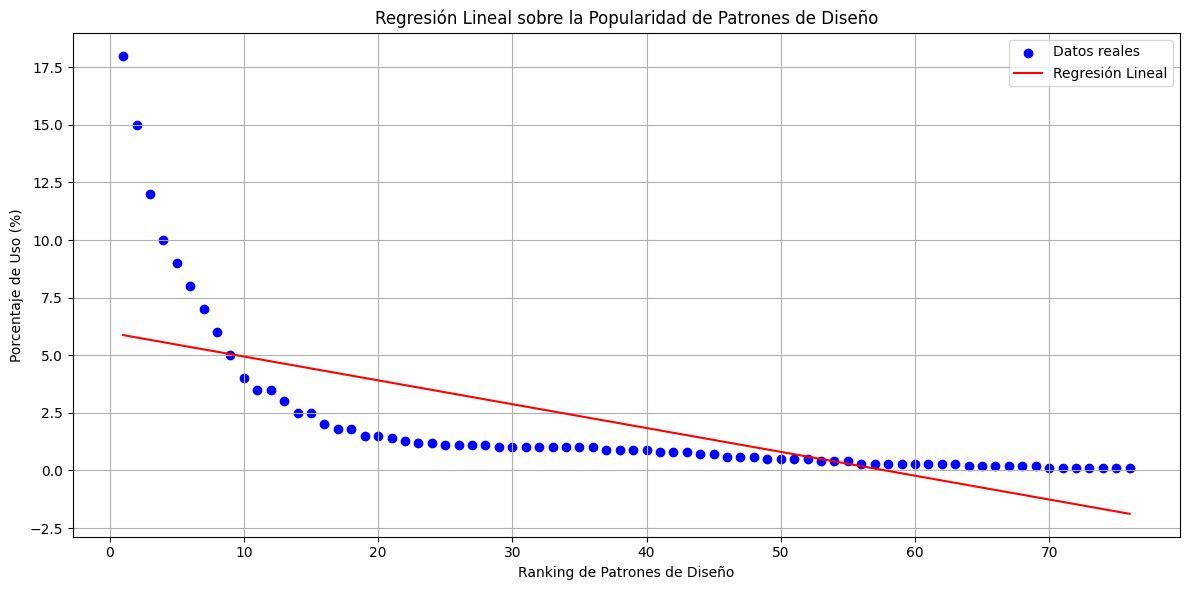

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# Definir el archivo CSV
archivo_csv = "patrones_de_diseño_2006.csv"  # Cambia esto a la ruta de tu archivo real
df = pd.read_csv(archivo_csv)

# Convertir todos los valores de la columna "Porcentaje (%)" a cadenas de texto
df["Porcentaje (%)"] = df["Porcentaje (%)"].astype(str)

# Remover el símbolo '%' y convertir la columna a flotantes
df["Porcentaje (%)"] = df["Porcentaje (%)"].str.rstrip('%').astype(float)

# Crear un índice ficticio como variable independiente
df = df.sort_values(by="Porcentaje (%)", ascending=False).reset_index(drop=True)
df["Ranking"] = np.arange(1, len(df) + 1)

# Separar las variables independiente (Ranking) y dependiente (Porcentaje (%))
X = df[["Ranking"]].values  # Variable independiente
y = df["Porcentaje (%)"].values  # Variable dependiente

# Crear y ajustar el modelo de regresión lineal
model = LinearRegression()
model.fit(X, y)

# Generar predicciones
y_pred = model.predict(X)

# Mostrar los coeficientes del modelo
print("Pendiente (coeficiente):", model.coef_[0])
print("Intercepto:", model.intercept_)

# Graficar los datos reales y la regresión lineal
plt.figure(figsize=(12, 6))
plt.scatter(df["Ranking"], df["Porcentaje (%)"], color="blue", label="Datos reales")
plt.plot(df["Ranking"], y_pred, color="red", label="Regresión Lineal")

# Etiquetas y título
plt.xlabel("Ranking de Patrones de Diseño")
plt.ylabel("Porcentaje de Uso (%)")
plt.title("Regresión Lineal sobre la Popularidad de Patrones de Diseño")
plt.legend()
plt.grid(True)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

